# Computational Methods in Astronomy and Space Sciences 
#### Anushka Agarwal

**Question 1**

Given equation : 
\begin{equation}
dy/dx = -xy
\end{equation}

with initial condition    
\begin{equation}
y(0)=1
\end{equation}



Solution:
\begin{equation}
y = exp(-x^2 /2)
\end{equation}

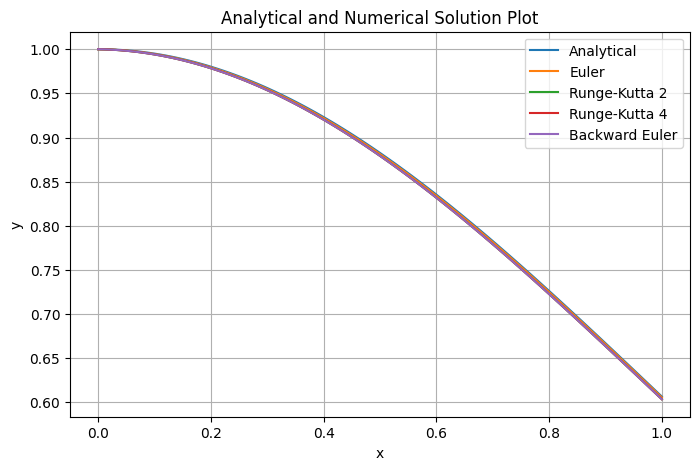

In [1]:
#importing_libraries
import numpy as np
import matplotlib.pyplot as plt

a,b,N=0,1,100  #limits_and_number_of_division

#initial_condition
yn_E = [1]
yn_RK2=[1]
yn_RK4=[1]
yn_BE=[1]
    
x= np.linspace(a,b,N)  #dividing into N-1 segments
delx = (b-a)/N         #length of a segment

#defining_given_function
def f(x,y):
    return -x*y

#numerical_solution_for_every_method
for i in range(1,N):
    #Euler
    yn_E.append((1-x[i]*delx)*yn_E[-1])
        
    #Runge-Kutta2
    k1= delx*f(x[i],yn_RK2[-1])
    k2= delx*f(x[i]+delx , yn_RK2[-1]+k1)
    yn_RK2.append(yn_RK2[-1] + k1/2 +k2/2)
    
    #Runge-Kutta4
    k1=delx*f(x[i],yn_RK4[-1])
    k2=delx*f(x[i]+(delx)/2 , yn_RK4[-1]+(k1/2))
    k3=delx*f(x[i]+ delx/2, yn_RK4[-1]+(k2/2))
    k4= delx*f(x[i]+delx,yn_RK4[-1] +k3)
    yn_RK4.append(yn_RK4[-1]+ 1/6*(k1+2*k2+2*k3+k4))
    
    #Backward_Euler
    yn_BE.append(yn_BE[-1]/(1+x[i]*delx))

ya = np.exp(-x**2/2) #analytical_solution

#plotting
plt.figure(figsize=(8,5))
plt.plot(x,ya, label='Analytical')
plt.plot(x,yn_E, label='Euler')
plt.plot(x,yn_RK2,label='Runge-Kutta 2')
plt.plot(x,yn_RK2,label='Runge-Kutta 4')
plt.plot(x,yn_RK2,label='Backward Euler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Analytical and Numerical Solution Plot')
plt.grid()
plt.legend()
plt.show()

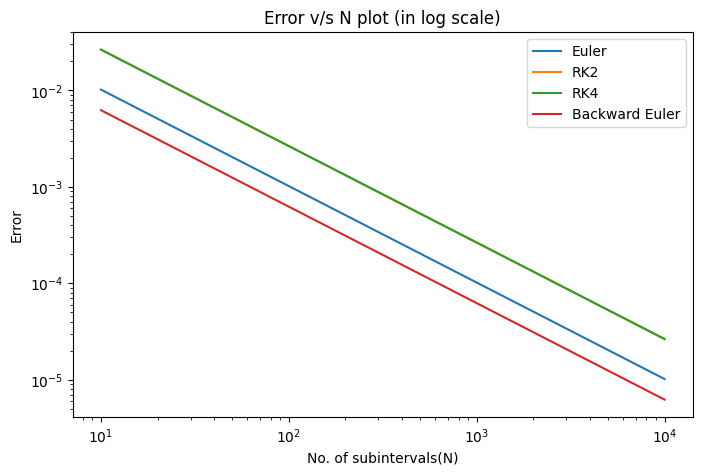

Order of error for Euler: -3.6904166352003926
Slope for RK2: -3.3425274215907086
Slope for RK4: -3.3424491360906585
Slope for Backward Euler: -3.869400347384256


In [2]:
#calculating_mean_global_error
def err(N):
    error1 = (np.sum(np.abs(yn_E - ya)))/N
    error2 = (np.sum(np.abs(yn_RK2 - ya)))/N
    error3 = (np.sum(np.abs(yn_RK4 - ya)))/N    
    error4 = (np.sum(np.abs(yn_BE - ya)))/N 
    
    return error1, error2, error3, error4

#initiatng_empty_arrays_to_store_error_at_each_point
error_E=[]
error_RK2=[]
error_RK4=[]
error_BE=[]

Ns=range(10,10000,2) #total_Ns_to_calculate_error_from

#appending_error_from_each_point_for_every_method
for i in Ns:
    error_E.append(err(i)[0])
    error_RK2.append(err(i)[1])
    error_RK4.append(err(i)[2])
    error_BE.append(err(i)[3])

#plotting
plt.figure(figsize=(8,5))
plt.plot(Ns,error_E,label='Euler')
plt.plot(Ns,error_RK2,label='RK2')
plt.plot(Ns,error_RK4,label='RK4')
plt.plot(Ns,error_BE,label='Backward Euler')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('No. of subintervals(N)')
plt.ylabel('Error')
plt.title('Error v/s N plot (in log scale)')
plt.legend()
plt.show() 

#order_of error_for every_method
print('Order of error for Euler:', (np.log(error_E[77]))-(np.log(error_E[12]))/(np.log(Ns[77])-np.log(Ns[12])))
print('Slope for RK2:',(np.log(error_RK2[77]))-(np.log(error_RK2[12]))/(np.log(Ns[77])-np.log(Ns[12])))
print('Slope for RK4:',(np.log(error_RK4[77]))-(np.log(error_RK4[12]))/(np.log(Ns[77])-np.log(Ns[12])))
print('Slope for Backward Euler:',(np.log(error_BE[77]))-(np.log(error_BE[12]))/(np.log(Ns[77])-np.log(Ns[12])))

**Interpretation for above plot:** The error, difference between analytical and numerical solution, here do decrease according to the methods but the difference is too small because the given equation is of the first order and simple but if we solve for higher order differential equation the difference will be much significant.

**Local error:** Error that comes with each step of iteration is called local truncation error, it is the difference between the exact solution and the approximation we make at that specific step. It is associated with the step size, smaller the step size smaller will be the local truncation error.
**Global error:** Global error is the mod of difference between the analytical and numerical solution, when we don't have analytic solution then we add up all the terms and calculate mean global error i.e. average error . This is the same formalism used in above code.

**Question 2**

Equation:  
$$
\frac{d^2 u}{d\theta^2} + u = \frac{1}{a(1-e^2)}$$ where $$u= \frac{1}{r}
$$ 
**First Initial Condition**:   At $\theta = 0$ star is at 'a' (semi major axis) distance away from the origin. Here r = a

Also at $\theta = 0$ $$\frac{dr}{d\theta} = 0$$
So 
**Second Initial Condition:**
$$
\frac{du}{d\theta}_{(\theta = 0)} = 0 
$$


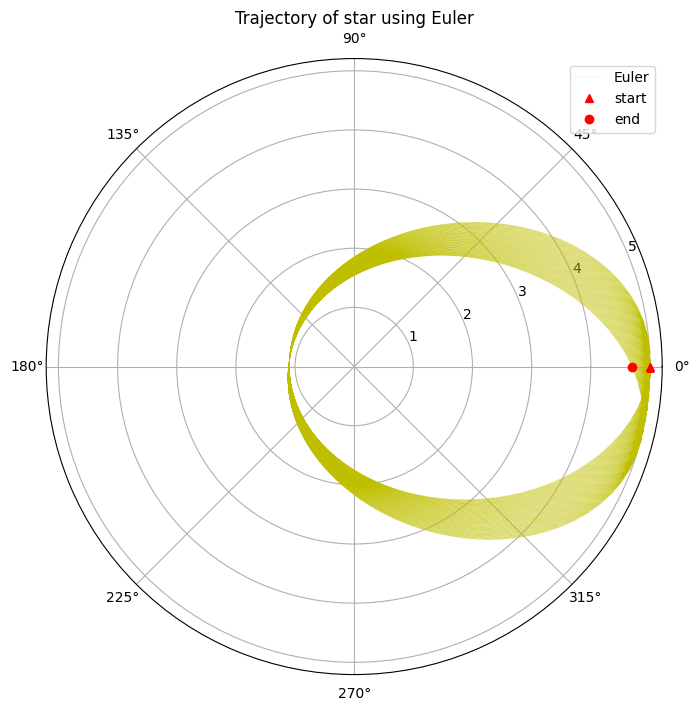

In [3]:
#given_values
a= 5       #semi_major_axis
e = 0.8    #eccentricity

#limits
lower_limit = 0
upper_limit = 320*np.pi  #160_Orbits

N= 10000   #no. of divisions
theta = np.linspace(lower_limit,upper_limit,N)   #dividing theta in N-1 segments
deltheta = (upper_limit - lower_limit)/N        #lenght of a segment

#defining_function
def f(u):
    return 1/(a*(1-e**2)) - u

#initial_values
U_E = [1/a]
Acc_E = [0]
U_RK2 = [1/a]
Acc_RK2 = [0] 


for i in range(1,N):
    #euler
    U_E.append(U_E[-1]+ deltheta*Acc_E[-1])
    Acc_E.append(Acc_E[-1]+ deltheta*f(U_E[-1]))
    
    #RK2
    k1=deltheta*Acc_RK2[-1]
    k2=deltheta*(Acc_RK2[-1]+k1)
    U_RK2.append(U_RK2[-1]+k1/2+k2/2)
    
    k1=deltheta*f(U_RK2[-1])
    k2=deltheta*f(U_RK2[-1]+k1)
    Acc_RK2.append(Acc_RK2[-1]+k1/2+k2/2)
     
#radius
R_E=1/np.array(U_E)
R_RK2=1/np.array(U_RK2)

#plotting_euler
plt.figure(figsize=(10,8))
plt.polar(theta, R_E, label='Euler', linewidth = 0.1, color='y')
plt.polar(theta[0],R_E[0],'r^', label='start') #starting_point
plt.polar(theta[-1],R_E[-1],'ro',label='end') #end_point
plt.title('Trajectory of star using Euler')
plt.legend()
plt.show()

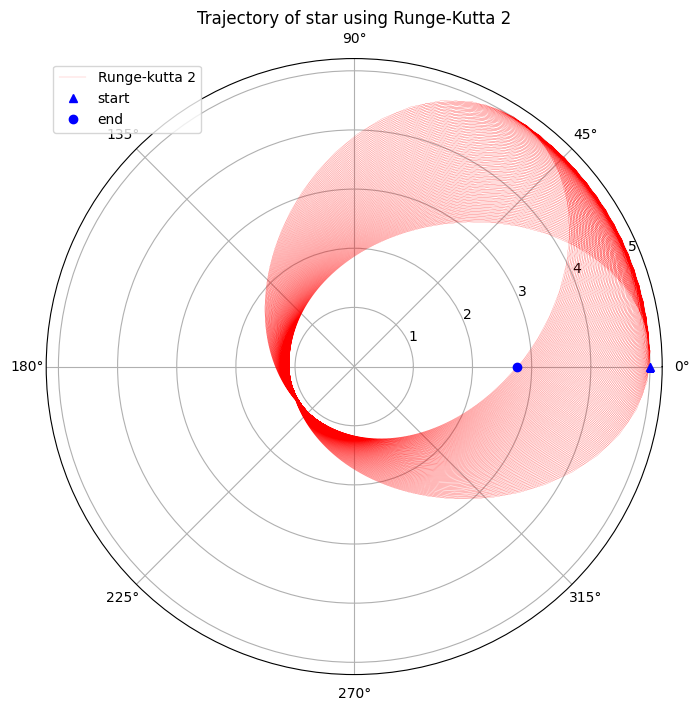

In [4]:
#plotting_RK2
plt.figure(figsize=(10,8))
plt.polar(theta, R_RK2,linewidth = 0.1, label='Runge-kutta 2',color='r')
plt.polar(theta[0],R_RK2[0],'b^', label='start') #starting_point
plt.polar(theta[-1],R_RK2[-1],'bo',label='end') #end_point
plt.title('Trajectory of star using Runge-Kutta 2')
plt.legend()
plt.show()

**Interpretation:** As the number of orbits is increasing, error is getting added and orbit is shifting from its initial position. Here surprisingly Euler method is more accurate than Runge-Kutta method, as it is less deviated from the initial point.